In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

EDA

In [3]:
ml_csv = pd.read_csv("ml-03-data-processing-songs-dataset.csv")
print(ml_csv.shape)
ml_csv.head()

(1994, 16)


,Index,Title,Artist,Top Genre,Year,Month,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004.0,10,157.0,30.0,53.0,-14.0,11.0,68.0,201,94.0,3.0,71.0
1,2,Black Night,Deep Purple,album rock,2000.0,3,135.0,79.0,50.0,-11.0,17.0,81.0,207,17.0,7.0,39.0
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001.0,6,168.0,69.0,66.0,-9.0,7.0,52.0,341,2.0,17.0,69.0
3,4,The Pretender,Foo Fighters,alternative metal,2007.0,1,173.0,96.0,43.0,-4.0,3.0,37.0,269,0.0,4.0,76.0
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002.0,8,106.0,82.0,58.0,-5.0,10.0,87.0,256,1.0,3.0,59.0


EDA

In [4]:
ml_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1994 non-null   int64  
 1   Title                   1991 non-null   object 
 2   Artist                  1986 non-null   object 
 3   Top Genre               1986 non-null   object 
 4   Year                    1987 non-null   float64
 5   Month                   1994 non-null   object 
 6   Beats Per Minute (BPM)  1985 non-null   float64
 7   Energy                  1986 non-null   float64
 8   Danceability            970 non-null    float64
 9   Loudness (dB)           1987 non-null   float64
 10  Liveness                1986 non-null   float64
 11  Valence                 960 non-null    float64
 12  Length (Duration)       1985 non-null   object 
 13  Acousticness            1986 non-null   float64
 14  Speechiness             1990 non-null   

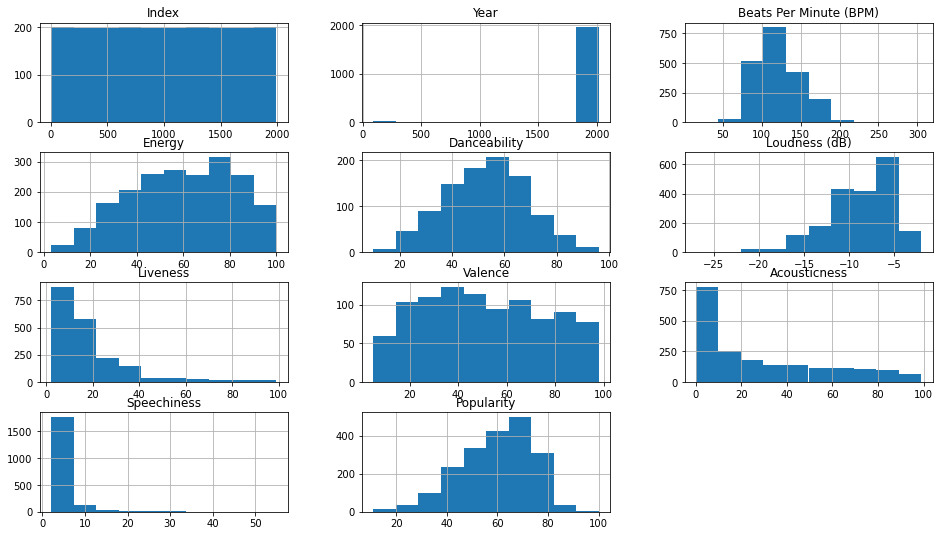

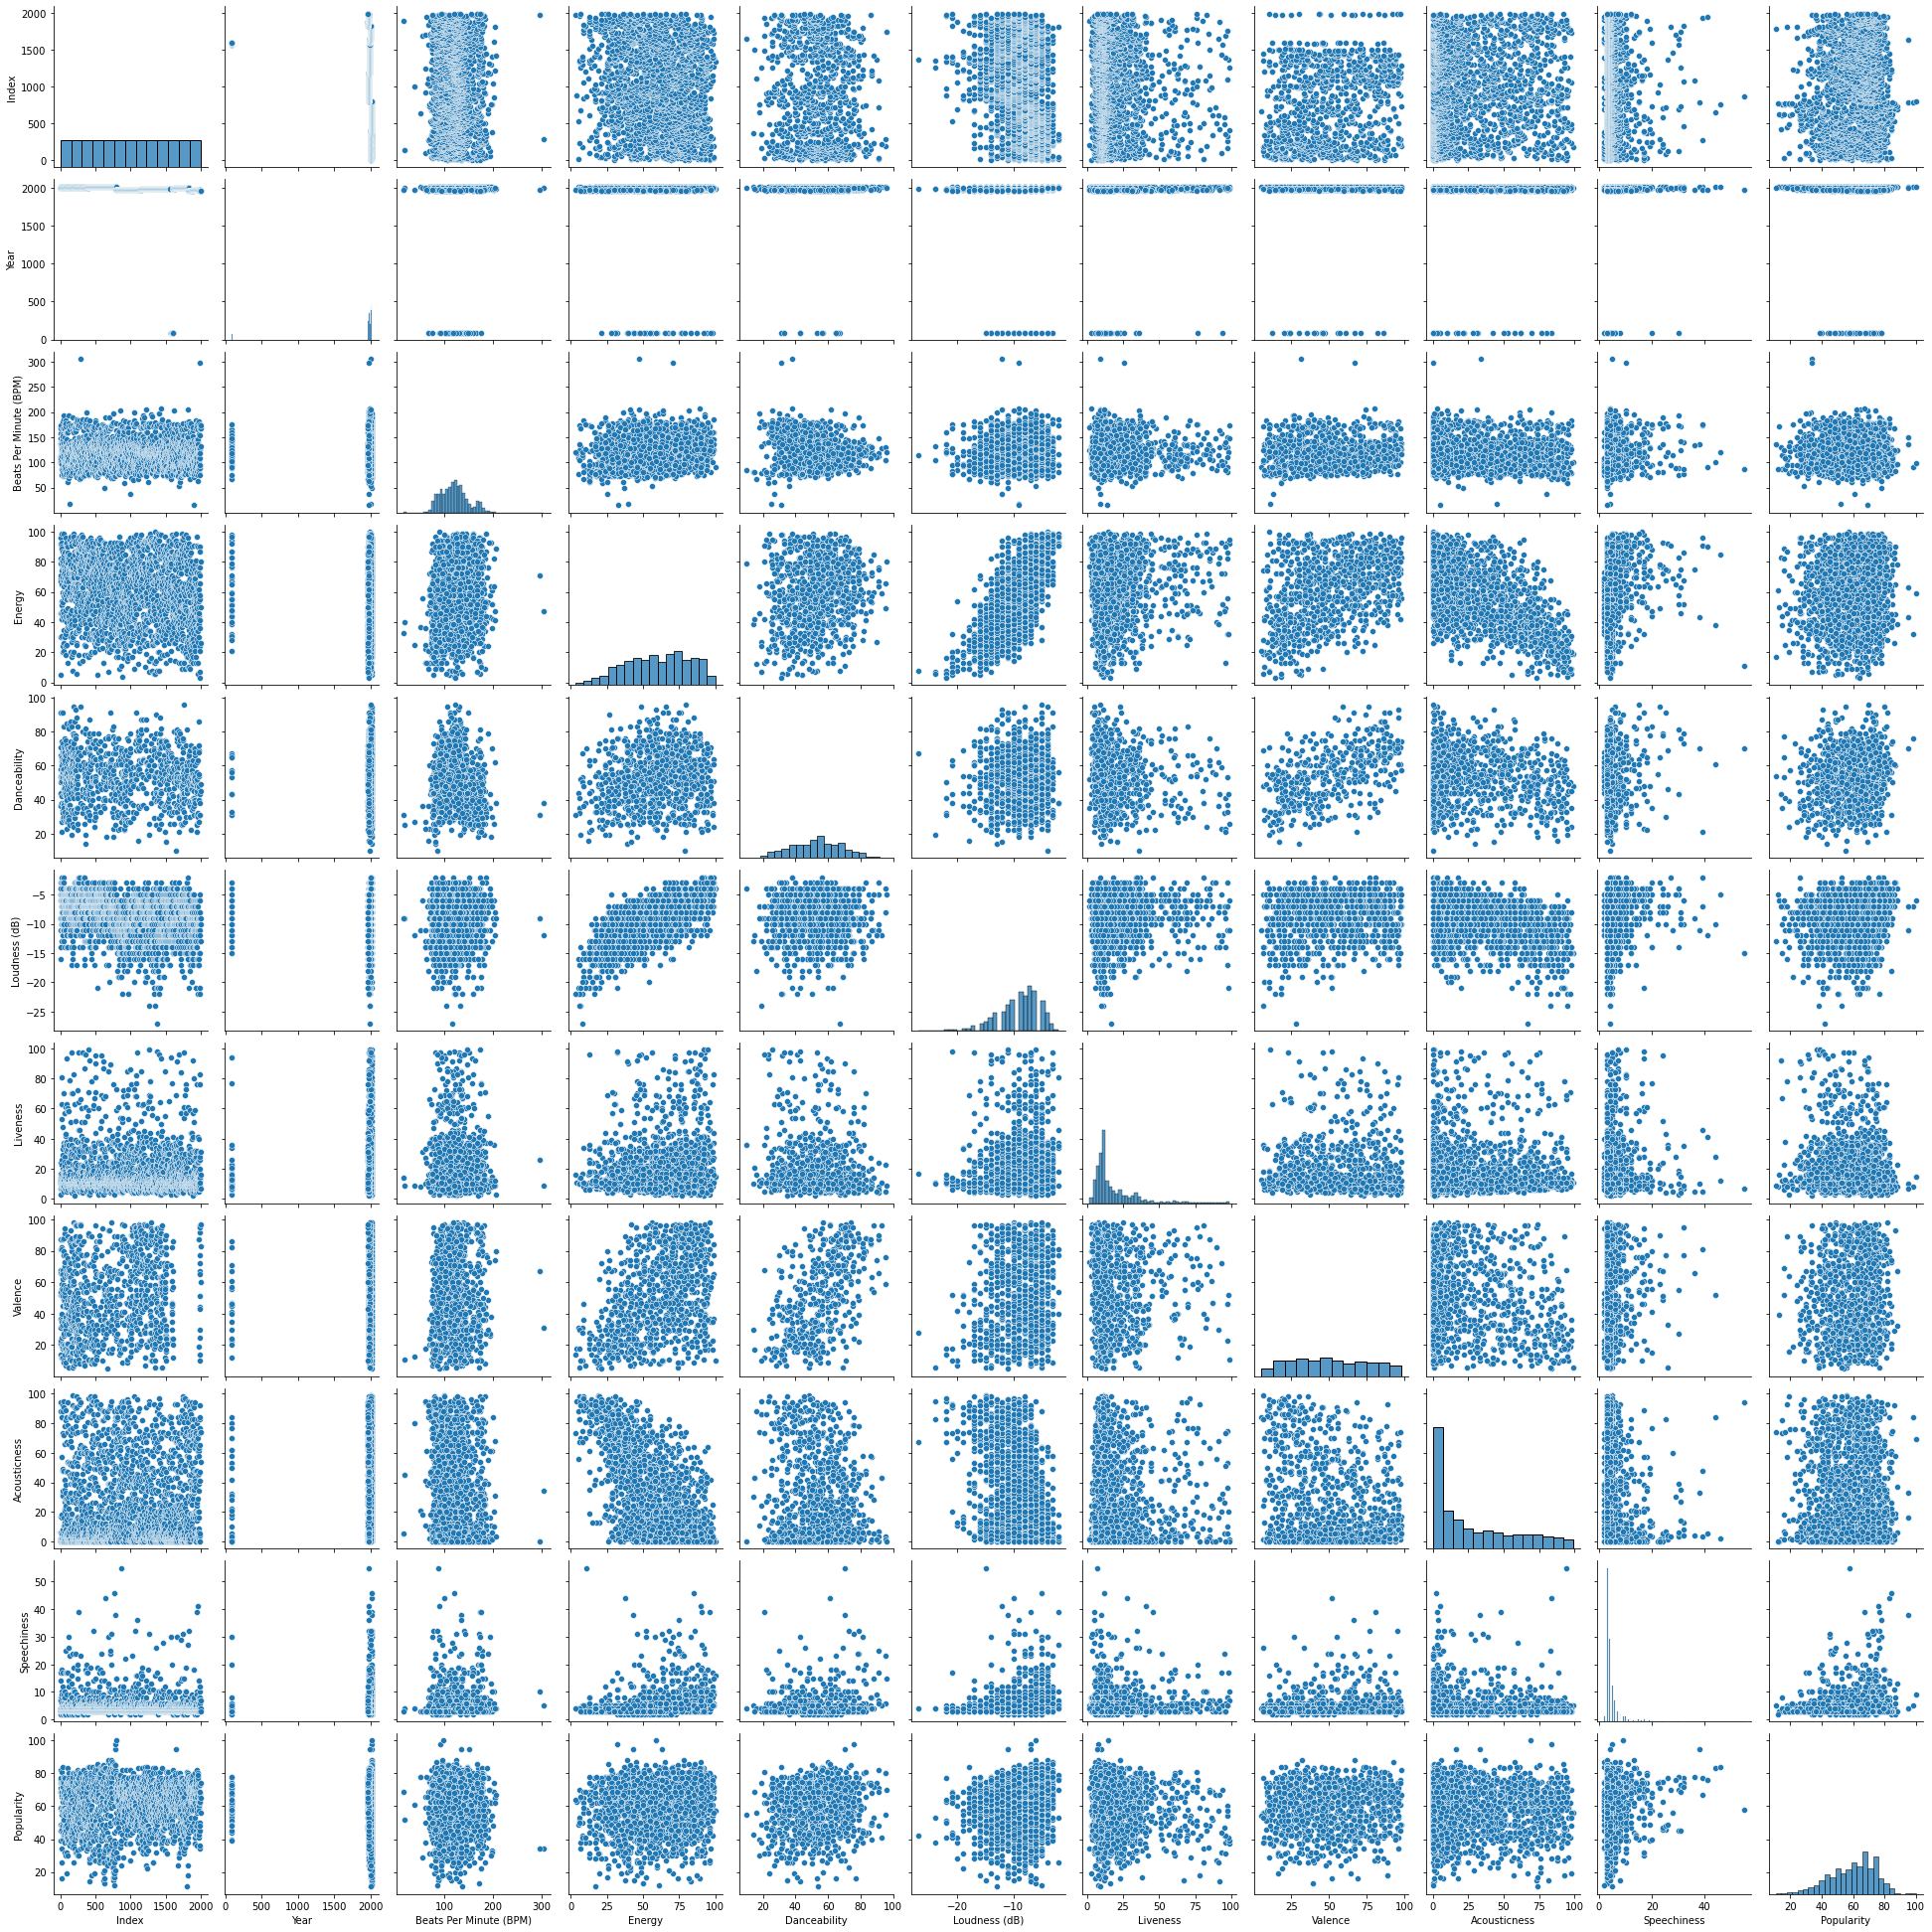

In [4]:
ml_csv.hist(figsize=(16,9))
sns.pairplot(ml_csv)

In [5]:
ml_csv.isna().sum()

Index                        0
Title                        3
Artist                       8
Top Genre                    8
Year                         7
Month                        0
Beats Per Minute (BPM)       9
Energy                       8
Danceability              1024
Loudness (dB)                7
Liveness                     8
Valence                   1034
Length (Duration)            9
Acousticness                 8
Speechiness                  4
Popularity                   7
dtype: int64

In [6]:
ml_csv["Month"] = ml_csv["Month"].astype(str)
print(len(ml_csv[ml_csv["Month"].str.isnumeric()==False]))
ml_csv[ml_csv["Month"].str.isnumeric()==False]

6


,Index,Title,Artist,Top Genre,Year,Month,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
448,449,Titanium (feat. Sia),David Guetta,dance pop,2011.0,Jan,126.0,79.0,NaN,-4.0,13.0,30.0,245,7.0,10.0,67.0
809,810,Immigrant Song - Remaster,Led Zeppelin,album rock,1970.0,Dec,113.0,93.0,NaN,-10.0,35.0,62.0,146,1.0,6.0,77.0
1061,1062,Spread Your Wings - 2011 Mix,Queen,glam rock,1977.0,Sep,175.0,66.0,NaN,-6.0,6.0,46.0,274,28.0,3.0,50.0
1645,1646,Glory Box,Portishead,art pop,1994.0,Apr,120.0,43.0,51.0,-10.0,6.0,NaN,309,18.0,4.0,67.0
1717,1718,Per Spoor (Kedeng Kedeng),Guus Meeuwis,dutch pop,1996.0,Jun,126.0,88.0,NaN,-7.0,15.0,NaN,253,20.0,5.0,49.0
1896,1897,Little Wing,Jimi Hendrix,album rock,1967.0,May,71.0,53.0,52.0,-8.0,5.0,NaN,146,18.0,8.0,69.0


Months put in a month abbrevation rather than number

In [7]:
ml_csv["Month"] = ml_csv["Month"].apply(lambda x : datetime.strptime(x, "%b").month if x.isnumeric()==False else x).astype(float)

In [8]:
print(len(ml_csv[ml_csv["Length (Duration)"].str.isnumeric()==False]))
ml_csv[ml_csv["Length (Duration)"].str.isnumeric()==False]

4


,Index,Title,Artist,Top Genre,Year,Month,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
842,843,Echoes,Pink Floyd,album rock,1971.0,4.0,134.0,32.0,NaN,-17.0,11.0,14.0,"1,412",37.0,4.0,58.0
904,905,Close to the Edge (i. The Solid Time of Change...,Yes,album rock,1972.0,9.0,81.0,60.0,22.0,-11.0,41.0,NaN,"1,121",27.0,6.0,47.0
951,952,Autobahn - 2009 Remaster,Kraftwerk,dance rock,1974.0,5.0,82.0,50.0,33.0,-16.0,13.0,11.0,"1,367",11.0,4.0,48.0
1982,1983,Get Ready,Rare Earth,blues rock,1969.0,10.0,127.0,87.0,NaN,-6.0,83.0,65.0,"1,292",0.0,4.0,45.0


commas added to nums over 1000

In [9]:
ml_csv["Length (Duration)"] = ml_csv["Length (Duration)"].apply(lambda x : float(str(x).replace(',', '')))
ml_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1994 non-null   int64  
 1   Title                   1991 non-null   object 
 2   Artist                  1986 non-null   object 
 3   Top Genre               1986 non-null   object 
 4   Year                    1987 non-null   float64
 5   Month                   1994 non-null   float64
 6   Beats Per Minute (BPM)  1985 non-null   float64
 7   Energy                  1986 non-null   float64
 8   Danceability            970 non-null    float64
 9   Loudness (dB)           1987 non-null   float64
 10  Liveness                1986 non-null   float64
 11  Valence                 960 non-null    float64
 12  Length (Duration)       1985 non-null   float64
 13  Acousticness            1986 non-null   float64
 14  Speechiness             1990 non-null   

<br><br><br>
***
***
<br><br><br>

## 2. Find the number of missing values in each column and each row. Remove rows where at least 50% of the values are missing. Then remove columns where at least 50% of the values are missing.

In [10]:
# Drop columns with over 50% nulls
# ml_csv = ml_csv.drop(["Danceability", "Valence"], axis= 1)
# columns = list(ml_csv.columns)
# rows_length = len(ml_csv)-1
# columns = len(list(ml_csv.columns))
# remove_list = []
# for row in range(0, rows_length):
#     row_info = ml_csv.iloc[row]
#     if (row_info.isnull().sum() >= columns/2):
#         remove_list.append(row)
# ml_csv = ml_csv.drop(remove_list, axis=0)

min_count = 0.5* ml_csv.shape[1]
ml_csv = ml_csv.dropna(axis=0, thresh = min_count)

In [12]:
ml_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1993
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1987 non-null   int64  
 1   Title                   1987 non-null   object 
 2   Artist                  1984 non-null   object 
 3   Top Genre               1983 non-null   object 
 4   Year                    1984 non-null   float64
 5   Month                   1987 non-null   float64
 6   Beats Per Minute (BPM)  1983 non-null   float64
 7   Energy                  1983 non-null   float64
 8   Danceability            970 non-null    float64
 9   Loudness (dB)           1983 non-null   float64
 10  Liveness                1983 non-null   float64
 11  Valence                 960 non-null    float64
 12  Length (Duration)       1982 non-null   float64
 13  Acousticness            1984 non-null   float64
 14  Speechiness             1986 non-null   

<br><br><br>
***
***
<br><br><br>

## 3. Calculate descriptive statistics for each column. Let's define an outlier as a value at least 3 standard deviations away from the mean. Which columns have outliers? What are those values?

In [11]:
ml_csv.describe()

,Index,Year,Month,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
count,1987.000000,1984.000000,1987.000000,1983.000000,1983.000000,970.000000,1983.000000,1983.000000,960.000000,1982.000000,1984.000000,1986.00000,1985.000000
mean,996.378460,1959.468246,6.522899,120.234493,59.653555,52.983505,-9.013616,19.019667,50.820833,262.616549,28.916835,4.99144,59.511839
std,575.975329,250.835292,3.419312,28.639923,22.170414,15.426169,3.653139,16.750412,24.955125,93.819708,29.028802,4.40705,14.366705
min,1.000000,92.000000,1.000000,15.000000,3.000000,10.000000,-27.000000,2.000000,5.000000,93.000000,0.000000,2.00000,11.000000
25%,497.500000,1978.000000,4.000000,99.000000,42.000000,42.000000,-11.000000,9.000000,30.000000,212.000000,3.000000,3.00000,49.000000
50%,996.000000,1993.000000,7.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,49.000000,245.000000,18.000000,4.00000,62.000000
75%,1494.500000,2007.000000,9.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,71.000000,290.000000,50.000000,5.00000,71.000000
max,1994.000000,2019.000000,12.000000,305.000000,100.000000,96.000000,-2.000000,99.000000,98.000000,1412.000000,99.000000,55.00000,100.000000


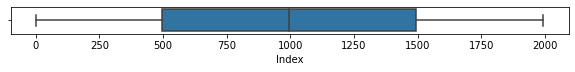

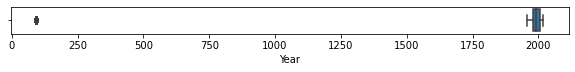

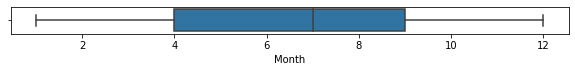

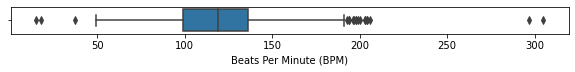

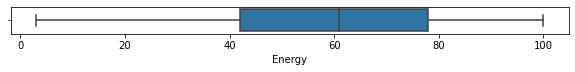

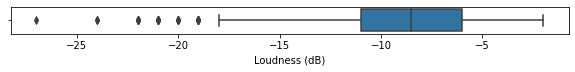

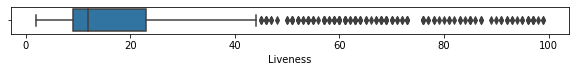

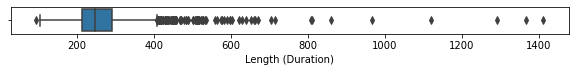

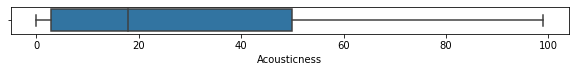

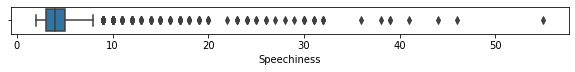

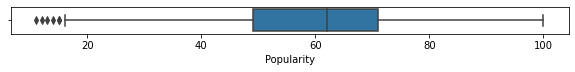

In [12]:
# outlier detection
ml_csv_numerical =ml_csv.select_dtypes(exclude=['object'])
for column in ml_csv_numerical:
    plt.figure(figsize=(10,0.5))
    sns.boxplot(data=ml_csv_numerical, x=column)

In [13]:
# some odd outliers in year and length
ml_csv[ml_csv["Year"] < 250].head()

,Index,Title,Artist,Top Genre,Year,Month,Beats Per Minute (BPM),Energy,Loudness (dB),Liveness,Length (Duration),Acousticness,Speechiness,Popularity
1567,1568,Killing In The Name,Rage Against The Machine,alternative metal,92.0,1.0,89.0,83.0,-4.0,3.0,314.0,3.0,30.0,78.0
1568,1569,Fear of the Dark - 2015 Remaster,Iron Maiden,album rock,92.0,1.0,110.0,87.0,-6.0,23.0,438.0,0.0,6.0,55.0
1569,1570,Bed Of Roses,Bon Jovi,glam metal,92.0,11.0,165.0,60.0,-6.0,21.0,394.0,10.0,3.0,73.0
1570,1571,Everybody Hurts,R.E.M.,alternative rock,92.0,11.0,94.0,32.0,-10.0,12.0,320.0,62.0,3.0,74.0
1571,1572,Kayleigh,Marillion,album rock,92.0,4.0,106.0,67.0,-7.0,9.0,243.0,2.0,3.0,58.0


In [14]:
ml_csv["Year"] = ml_csv["Year"].apply(lambda x : 1992 if x == 92 else x).astype(float)

<AxesSubplot:xlabel='Year'>

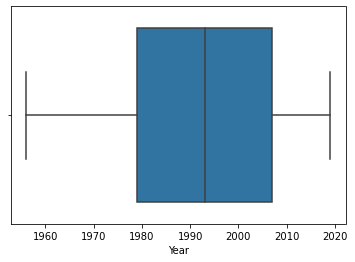

In [15]:
sns.boxplot(data=ml_csv, x="Year")
# fixed

In [16]:
ml_csv[ml_csv["Length (Duration)"] > 1000].head()
# checked online - correct times

,Index,Title,Artist,Top Genre,Year,Month,Beats Per Minute (BPM),Energy,Loudness (dB),Liveness,Length (Duration),Acousticness,Speechiness,Popularity
842,843,Echoes,Pink Floyd,album rock,1971.0,4.0,134.0,32.0,-17.0,11.0,1412.0,37.0,4.0,58.0
904,905,Close to the Edge (i. The Solid Time of Change...,Yes,album rock,1972.0,9.0,81.0,60.0,-11.0,41.0,1121.0,27.0,6.0,47.0
951,952,Autobahn - 2009 Remaster,Kraftwerk,dance rock,1974.0,5.0,82.0,50.0,-16.0,13.0,1367.0,11.0,4.0,48.0
1982,1983,Get Ready,Rare Earth,blues rock,1969.0,10.0,127.0,87.0,-6.0,83.0,1292.0,0.0,4.0,45.0


In [17]:
ml_csv.info()
#still need to deal with nulls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1986 non-null   int64  
 1   Title                   1986 non-null   object 
 2   Artist                  1983 non-null   object 
 3   Top Genre               1983 non-null   object 
 4   Year                    1984 non-null   float64
 5   Month                   1986 non-null   float64
 6   Beats Per Minute (BPM)  1983 non-null   float64
 7   Energy                  1982 non-null   float64
 8   Loudness (dB)           1982 non-null   float64
 9   Liveness                1983 non-null   float64
 10  Length (Duration)       1982 non-null   float64
 11  Acousticness            1984 non-null   float64
 12  Speechiness             1985 non-null   float64
 13  Popularity              1985 non-null   float64
dtypes: float64(10), int64(1), object(3)
memo

<br><br><br>
***
***
<br><br><br>

## 4. With the remaining columns, use scikit-learn to impute missing values. For continuous features, fill in the mean. For categorical features, fill in the mode.

In [18]:
imputer_continuos = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer_discrete = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

ml_csv["Artist"] = imputer_discrete.fit_transform(ml_csv["Artist"].values.reshape(-1,1))[:,0]
ml_csv["Top Genre"] = imputer_discrete.fit_transform(ml_csv["Top Genre"].values.reshape(-1,1))[:,0]
ml_csv["Month"] = imputer_discrete.fit_transform(ml_csv["Month"].values.reshape(-1,1))[:,0]

ml_csv["Year"] = imputer_continuos.fit_transform(ml_csv["Year"].values.reshape(-1,1))[:,0]
ml_csv["Beats Per Minute (BPM)"] = imputer_continuos.fit_transform(ml_csv["Beats Per Minute (BPM)"].values.reshape(-1,1))[:,0]
ml_csv["Energy"] = imputer_continuos.fit_transform(ml_csv["Energy"].values.reshape(-1,1))[:,0]
ml_csv["Loudness (dB)"] = imputer_continuos.fit_transform(ml_csv["Loudness (dB)"].values.reshape(-1,1))[:,0]
ml_csv["Liveness"] = imputer_continuos.fit_transform(ml_csv["Liveness"].values.reshape(-1,1))[:,0]
ml_csv["Length (Duration)"] = imputer_continuos.fit_transform(ml_csv["Length (Duration)"].values.reshape(-1,1))[:,0]
ml_csv["Acousticness"] = imputer_continuos.fit_transform(ml_csv["Acousticness"].values.reshape(-1,1))[:,0]
ml_csv["Speechiness"] = imputer_continuos.fit_transform(ml_csv["Speechiness"].values.reshape(-1,1))[:,0]
ml_csv["Popularity"] = imputer_continuos.fit_transform(ml_csv["Popularity"].values.reshape(-1,1))[:,0]

ml_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1986 non-null   int64  
 1   Title                   1986 non-null   object 
 2   Artist                  1986 non-null   object 
 3   Top Genre               1986 non-null   object 
 4   Year                    1986 non-null   float64
 5   Month                   1986 non-null   float64
 6   Beats Per Minute (BPM)  1986 non-null   float64
 7   Energy                  1986 non-null   float64
 8   Loudness (dB)           1986 non-null   float64
 9   Liveness                1986 non-null   float64
 10  Length (Duration)       1986 non-null   float64
 11  Acousticness            1986 non-null   float64
 12  Speechiness             1986 non-null   float64
 13  Popularity              1986 non-null   float64
dtypes: float64(10), int64(1), object(3)
memo

<br><br><br>
***
***
<br><br><br>

## 5. Combine the date-related columns into one column with the Pandas to_datetime() method, then use that column to create a numeric Age column (in years). Calculate Age based on today's date; it doesn't have to be a whole number. Once you've created the Age column, remove the other date-related columns, including the one you created with Pandas.

In [19]:
ml_csv["Age"] = ml_csv["Year"].astype(int).astype(str).apply(lambda x : x.zfill(4)) + ml_csv["Month"].astype(int).astype(str).apply(lambda x : x.zfill(2))
ml_csv["Age"] = ml_csv["Age"].apply(lambda x : pd.to_datetime(x, format="%Y%m"))
ml_csv["Age"] = ml_csv["Age"].apply(lambda x : (datetime.today() - x).days/365.25)

In [20]:
ml_csv = ml_csv.drop(["Year", "Month"], axis = 1)
ml_csv.head()

,Index,Title,Artist,Top Genre,Beats Per Minute (BPM),Energy,Loudness (dB),Liveness,Length (Duration),Acousticness,Speechiness,Popularity,Age
0,1,Sunrise,Norah Jones,adult standards,157.0,30.0,-14.0,11.0,201.0,94.0,3.0,71.0,17.930185
1,2,Black Night,Deep Purple,album rock,135.0,79.0,-11.0,17.0,207.0,17.0,7.0,39.0,22.516085
2,3,Clint Eastwood,Gorillaz,alternative hip hop,168.0,69.0,-9.0,7.0,341.0,2.0,17.0,69.0,21.264887
3,4,The Pretender,Foo Fighters,alternative metal,173.0,96.0,-4.0,3.0,269.0,0.0,4.0,76.0,15.679671
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,106.0,82.0,-5.0,10.0,256.0,1.0,3.0,59.0,20.098563


In [21]:
ml_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1993
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1986 non-null   int64  
 1   Title                   1986 non-null   object 
 2   Artist                  1986 non-null   object 
 3   Top Genre               1986 non-null   object 
 4   Beats Per Minute (BPM)  1986 non-null   float64
 5   Energy                  1986 non-null   float64
 6   Loudness (dB)           1986 non-null   float64
 7   Liveness                1986 non-null   float64
 8   Length (Duration)       1986 non-null   float64
 9   Acousticness            1986 non-null   float64
 10  Speechiness             1986 non-null   float64
 11  Popularity              1986 non-null   float64
 12  Age                     1986 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 217.2+ KB


<br><br><br>
***
***
<br><br><br>

## 6. Create dummy variables for the categorical features. Drop one level of each feature to end up with k-1 dummies, not k.

In [22]:
ml_csv = pd.get_dummies(ml_csv, columns=["Title", "Artist", "Top Genre"])
ml_csv.head()

,Index,Beats Per Minute (BPM),Energy,Loudness (dB),Liveness,Length (Duration),Acousticness,Speechiness,Popularity,Age,...,Top Genre_reggae,Top Genre_reggae fusion,Top Genre_rock-and-roll,Top Genre_scottish singer-songwriter,Top Genre_soft rock,Top Genre_stomp and holler,Top Genre_streektaal,Top Genre_trance,Top Genre_uk pop,Top Genre_yacht rock
0,1,157.0,30.0,-14.0,11.0,201.0,94.0,3.0,71.0,17.930185,...,0,0,0,0,0,0,0,0,0,0
1,2,135.0,79.0,-11.0,17.0,207.0,17.0,7.0,39.0,22.516085,...,0,0,0,0,0,0,0,0,0,0
2,3,168.0,69.0,-9.0,7.0,341.0,2.0,17.0,69.0,21.264887,...,0,0,0,0,0,0,0,0,0,0
3,4,173.0,96.0,-4.0,3.0,269.0,0.0,4.0,76.0,15.679671,...,0,0,0,0,0,0,0,0,0,0
4,5,106.0,82.0,-5.0,10.0,256.0,1.0,3.0,59.0,20.098563,...,0,0,0,0,0,0,0,0,0,0


In [23]:
drop_Title = str(list(ml_csv.columns)[10:11][0])
drop_Artist = str(list(ml_csv.columns)[2100:2101][0])
drop_Top_Genre = str(list(ml_csv.columns)[2837:2838][0])
print(drop_Title, drop_Artist, drop_Top_Genre)
print(len(ml_csv.columns))

Title_(Don't Fear) The Reaper Artist_Dan Hartman Top Genre_yacht rock
2838


In [24]:
# k-1 dummies ~ loose 3 columns
ml_csv = ml_csv.drop([drop_Title, drop_Artist, drop_Top_Genre], axis=1)
print(len(ml_csv.columns))

2835


<br><br><br>
***
***
<br><br><br>

## 7. Save your work up to this point. Mark the end of this exercise in your notebook. If you have questions, reach out to an instructor.

In [25]:
ml_csv.to_csv("cleaned_data.csv", sep=',', encoding='utf-8')